# Metropolis Hastings MCMC V1 Sept 2023

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


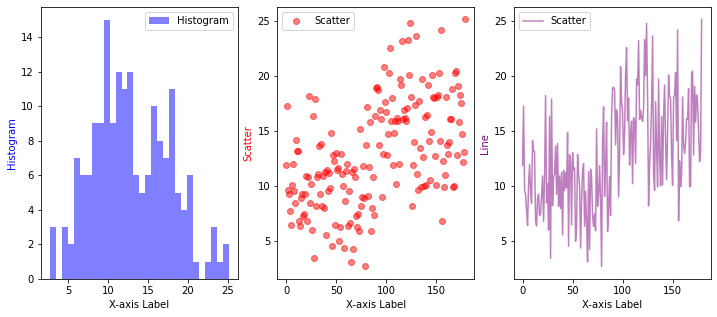

In [332]:
np.random.seed(7121996)

lam1 = 10
lam2 = 15

# Generate two sets of synthetic data and combine them
data1 = np.random.poisson(lam1, size=90) + np.random.normal(loc=0,scale=1.2, size=90)
data2 = np.random.poisson(lam2, size=90) + np.random.normal(loc=0,scale=0.2, size=90)

synthetic_data = np.concatenate((data1, data2))

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 5))  # Adjust figsize as needed

# Plot a histogram in the first subplot
axs[0].hist(synthetic_data, bins=30, alpha=0.5, color='blue', label='Histogram')

# Plot a scatter plot in the second subplot
axs[1].scatter(range(len(synthetic_data)), synthetic_data, alpha=0.5, color='red', label='Scatter')

# Plot a scatter plot in the second subplot
axs[2].plot(range(len(synthetic_data)), synthetic_data, alpha=0.5, color='purple', label='Scatter')

# Add labels and legends to each subplot
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Histogram', color='blue')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Scatter', color='red')
axs[2].set_xlabel('X-axis Label')
axs[2].set_ylabel('Line', color='purple')


# Add a legend to each subplot
lines0, labels0 = axs[0].get_legend_handles_labels()
lines1, labels1 = axs[1].get_legend_handles_labels()
lines2, labels2 = axs[2].get_legend_handles_labels()

axs[0].legend(lines0, labels0, loc='best')
axs[1].legend(lines1, labels1, loc='best')
axs[2].legend(lines2, labels2, loc='best')

# Adjust spacing between subplots
plt.show()

In [319]:
# Define the likelihood function
def likelihood(data, lambdas):
    likelihoods = []

    for x, lambd in zip(data, lambdas):
        # Likelihood for the Poisson component
        poisson_likelihood = stats.poisson.pmf(x, lambd)

        # Likelihood for the normal component
        #normal_likelihood = stats.norm.pdf(0, loc=0, scale=0.9) * \
        #                    stats.norm.pdf(0, loc=0, scale=1.1) * \
        #                    stats.norm.pdf(0, loc=0, scale=0.6)  # Assuming common normal parameters

        # Combine the likelihoods for the Poisson and normal components
        combined_likelihood = poisson_likelihood #* normal_likelihood
        likelihoods.append(combined_likelihood)

    return np.prod(likelihoods)

def prior(lambdas):
    # Check if any value in lambdas is less than 0
    for i in range(len(lambdas)):
        if lambdas[i] < 0:
            return 0.0
        else:
            return 1.0


# Define the posterior distribution
def posterior(data, lambdas):
    return likelihood(data, lambdas) * prior(lambdas)

# Define MH MCMC
def metropolis_hastings(parameters, num_samples, proposal_std_dev, data):
    samples = [parameters.copy()]
    current_params = parameters.copy()

    for _ in range(num_samples):
        # Propose new lambdas
        proposed_params = current_params + np.random.normal(scale=proposal_std_dev, size=len(parameters))

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, posterior(data, proposed_params) / posterior(data, current_params))

        # Accept or reject the proposed lambdas
        if np.random.rand() < acceptance_ratio:
            current_params = proposed_params

        samples.append(current_params)

    return np.array(samples)

In [333]:
# Set the initial parameters, number of samples, proposal standard deviation, and param_to_update
initial_parameters = np.array([2,12])
num_samples = 100000
proposal_std_dev = 0.05
param_to_update = 1  # Index of the parameter to update

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(initial_parameters, num_samples, proposal_std_dev, synthetic_data)

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/1749090420.py:43: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_ratio = min(1, posterior(data, proposed_params) / posterior(data, current_params))


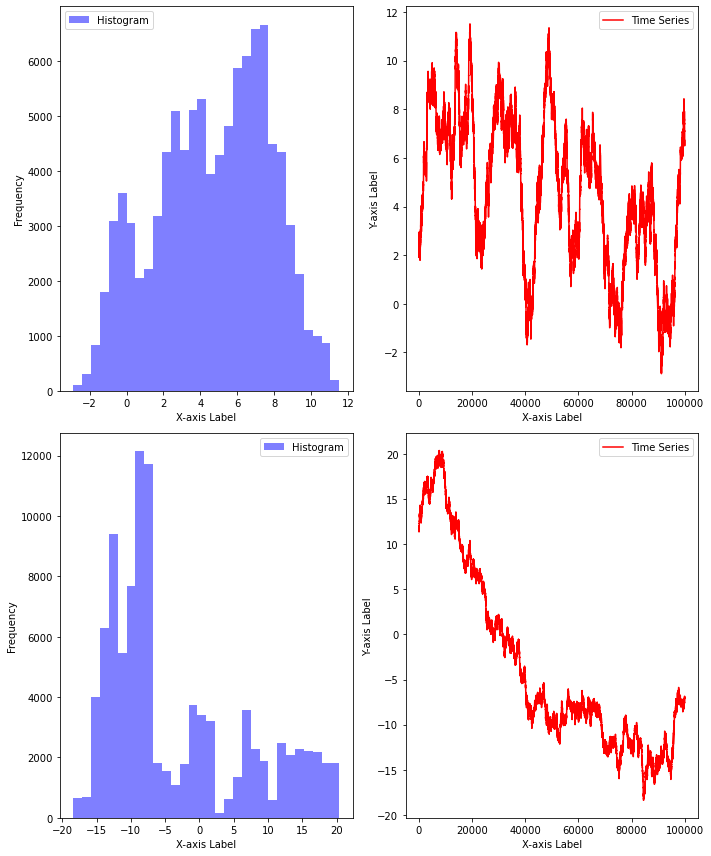

In [334]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# Plot histograms in the left column (index 0) of each row
for i in range(2):
    ax[i, 0].hist(samples[:,i], bins=30, alpha=0.5, color='blue', label='Histogram')
    ax[i, 0].set_xlabel('X-axis Label')
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].legend(loc='best')
    
# Plot time series in the right column (index 1) of each row
for i in range(2):
    ax[i, 1].plot(samples[:,i], color='red', label='Time Series')
    ax[i, 1].set_xlabel('X-axis Label')
    ax[i, 1].set_ylabel('Y-axis Label')
    ax[i, 1].legend(loc='best')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

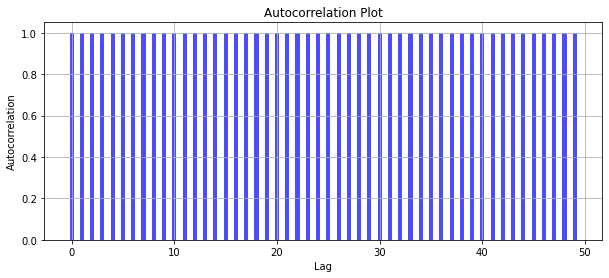

In [337]:
# Calculate autocorrelation function (ACF)
def autocorrelation(samples, lag):
    n = len(samples)
    mean = np.mean(samples)
    numerator = np.sum((samples[:n - lag] - mean) * (samples[lag:] - mean))
    denominator = np.sum((samples - mean) ** 2)
    return numerator / denominator

# Create an autocorrelation plot
max_lag = 50  # Maximum lag to consider
acf_values = [autocorrelation(samples, lag) for lag in range(max_lag)]

# Plot the autocorrelation values
plt.figure(figsize=(10, 4))
plt.bar(range(max_lag), acf_values, width=0.4, color='blue', alpha=0.7)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)

# Show the plot
plt.show()

In [331]:
posterior_mean = np.mean(samples, axis=0)
posterior_std = np.std(samples, axis=0)

print(posterior_mean, posterior_std)

[13.392986    5.42738011] [6.69909848 4.09726872]


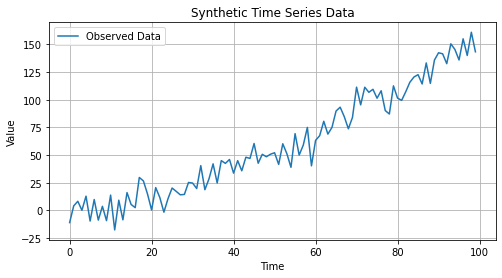

In [220]:
# Simulate time series data with a linear trend and noise
num_points = 100
time_points = np.arange(num_points)
true_slope = 0.5 + 0.01 * time_points
true_intercept = 2.0 + np.cos(time_points)
noise = np.random.normal(0, 10, num_points)
observed_data = true_slope * time_points + true_intercept + noise

plt.figure(figsize=(8, 4))
plt.plot(time_points, observed_data, label="Observed Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Synthetic Time Series Data")
plt.grid(True)
plt.show()

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/52669435.py:33: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_ratio = min(1, likelihood_proposed / likelihood_current)
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/52669435.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_ratio = min(1, likelihood_proposed / likelihood_current)


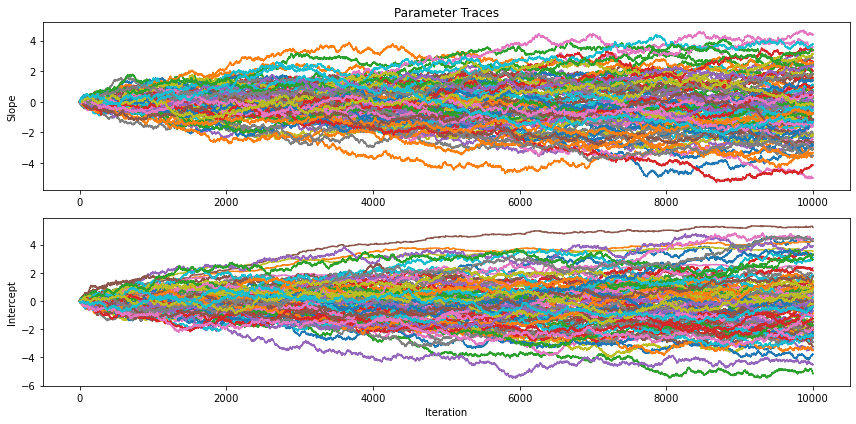

In [224]:
# Define likelihood and prior functions
def likelihood(data, slope, intercept, sigma):
    # Gaussian likelihood
    return np.prod(stats.norm.pdf(data, loc=slope * time_points + intercept, scale=sigma))

def prior(slope, intercept):
    # Non-informative priors (flat priors)
    return 1.0

# Metropolis-Hastings MCMC for time-varying parameters
num_samples = 10000
proposal_std_dev = 0.02
sigma = 1.0  # Noise standard deviation

# Initialize parameter values
current_slope = np.zeros(num_points)
current_intercept = np.zeros(num_points)

# Lists to store samples
slope_samples = []
intercept_samples = []

for _ in range(num_samples):
    for t in range(num_points):
        # Propose new parameter values
        proposed_slope = current_slope[t] + np.random.normal(scale=proposal_std_dev)
        proposed_intercept = current_intercept[t] + np.random.normal(scale=proposal_std_dev)

        # Calculate the acceptance ratio
        likelihood_current = likelihood(observed_data[t], current_slope[t], current_intercept[t], sigma)
        likelihood_proposed = likelihood(observed_data[t], proposed_slope, proposed_intercept, sigma)

        acceptance_ratio = min(1, likelihood_proposed / likelihood_current)

        # Accept or reject the proposed values
        if np.random.rand() < acceptance_ratio:
            current_slope[t] = proposed_slope
            current_intercept[t] = proposed_intercept

    # Store the samples
    slope_samples.append(current_slope.copy())
    intercept_samples.append(current_intercept.copy())

# Plot parameter traces
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(slope_samples)
plt.ylabel("Slope")
plt.title("Parameter Traces")

plt.subplot(2, 1, 2)
plt.plot(intercept_samples)
plt.ylabel("Intercept")
plt.xlabel("Iteration")

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time')

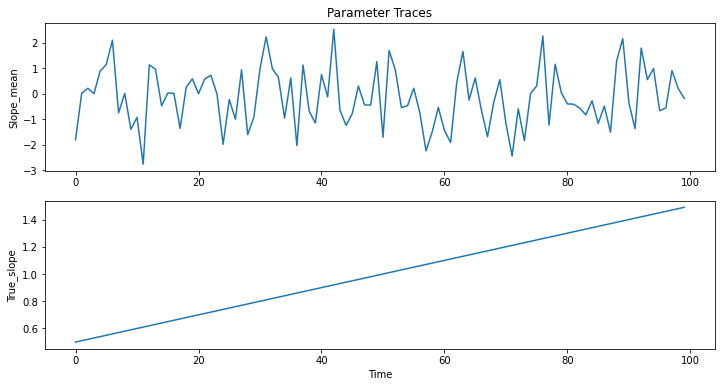

In [240]:
slope_mean = np.mean(slope_samples, axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(slope_mean)
plt.ylabel("Slope_mean")
plt.title("Parameter Traces")

plt.subplot(2, 1, 2)
plt.plot(true_slope)
plt.ylabel("True_slope")
plt.xlabel("Time")


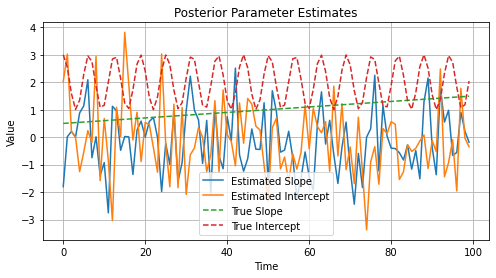

In [225]:
# Posterior parameter estimates
slope_mean = np.mean(slope_samples, axis=0)
intercept_mean = np.mean(intercept_samples, axis=0)

# Plot posterior parameter estimates
plt.figure(figsize=(8, 4))
plt.plot(time_points, slope_mean, label="Estimated Slope")
plt.plot(time_points, intercept_mean, label="Estimated Intercept")
plt.plot(time_points, true_slope, label="True Slope", linestyle="--")
plt.plot(time_points, true_intercept, label="True Intercept", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Posterior Parameter Estimates")
plt.grid(True)
plt.show()


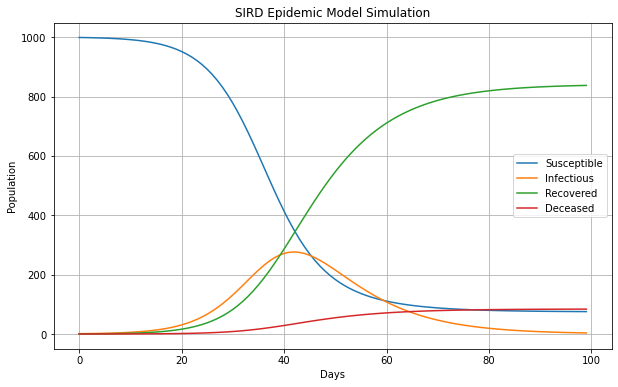

In [221]:
# Parameters (constants)
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
nu = 0.01  # Mortality rate
population = 1000  # Total population

# Initial conditions
S = [population - 1]  # Initial susceptible
I = [1]  # Initial infectious
R = [0]  # Initial recovered
D = [0]  # Initial deceased

# Simulation duration (number of days)
num_days = 100

# Simulate the epidemic using a for loop
for day in range(1, num_days):
    # Calculate new values for each compartment using the SIRD equations
    new_infectious = beta * S[day - 1] * I[day - 1] / population
    new_recovered = gamma * I[day - 1]
    new_deceased = nu * I[day - 1]

    # Update the compartments for the current day
    S.append(S[day - 1] - new_infectious)
    I.append(I[day - 1] + new_infectious - new_recovered - new_deceased)
    R.append(R[day - 1] + new_recovered)
    D.append(D[day - 1] + new_deceased)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infectious')
plt.plot(R, label='Recovered')
plt.plot(D, label='Deceased')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIRD Epidemic Model Simulation')
plt.legend()
plt.grid(True)
plt.show()

## MCMC for time varying patemeters

# Specify the number of time periods (T), the number of iterations (including burn-in), and the burn-in period
# Assuming data is a list or array containing data for each time period
total_iterations = 5000
burn_in = 1000

# Initialize arrays to store parameter samples
theta_samples = np.zeros((T, total_iterations - burn_in, num_parameters))  # num_parameters is the number of parameters in theta

# Loop through all time periods
for t in range(T):
    # Initialize your parameter values (theta) for the current time period
    theta_current = initial_theta  # initial_theta should be a vector of initial parameter values

    # MCMC Sampling Loop
    for iteration in range(total_iterations):
        # Propose a new parameter value (theta_proposed) based on a proposal distribution
        theta_proposed = propose_new_theta(theta_current)

        # Calculate the acceptance ratio
        acceptance_ratio = calculate_acceptance_ratio(data[t], SIRD_t[t], theta_proposed, theta_current)

        # Accept or reject the proposed parameter value
        if np.random.rand() < acceptance_ratio:
            theta_current = theta_proposed

        # Store the parameter sample if beyond the burn-in period
        if iteration >= burn_in:
            theta_samples[t, iteration - burn_in] = theta_current

# Extract samples after burn-in for each time period
post_burn_in_samples = theta_samples[:, :, :]

# Compute posterior statistics (e.g., posterior means, credible intervals, etc.) on post_burn_in_samples

# Perform further analysis and visualization of parameter estimates at each time period


In [245]:
WHO = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
WHO.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [250]:
MX = WHO[WHO['Country']=='Mexico']
MX.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
181972,2020-01-03,MX,Mexico,AMRO,0,0,0,0
181973,2020-01-04,MX,Mexico,AMRO,0,0,0,0
181974,2020-01-05,MX,Mexico,AMRO,0,0,0,0
181975,2020-01-06,MX,Mexico,AMRO,0,0,0,0
181976,2020-01-07,MX,Mexico,AMRO,0,0,0,0


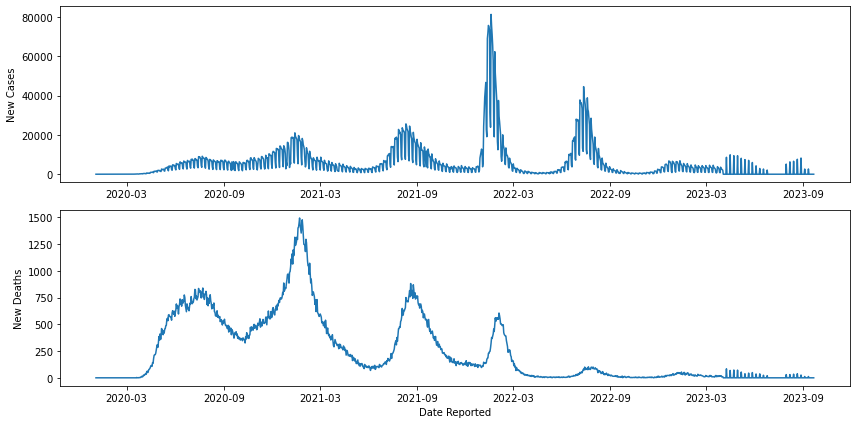

In [264]:
import matplotlib.dates as mdates

# Create a figure with two subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot New_cases in the first subplot
ax[0].plot(pd.to_datetime(MX['Date_reported']), MX['New_cases'])
ax[0].set_ylabel('New Cases')

# Plot New_deaths in the second subplot
ax[1].plot(pd.to_datetime(MX['Date_reported']), MX['New_deaths'])
ax[1].set_ylabel('New Deaths')

# Set common x-axis label
ax[1].set_xlabel('Date Reported')

# Format x-axis ticks to show only every 6 months
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Adjust the date format as needed
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Adjust the date format as needed

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


[]

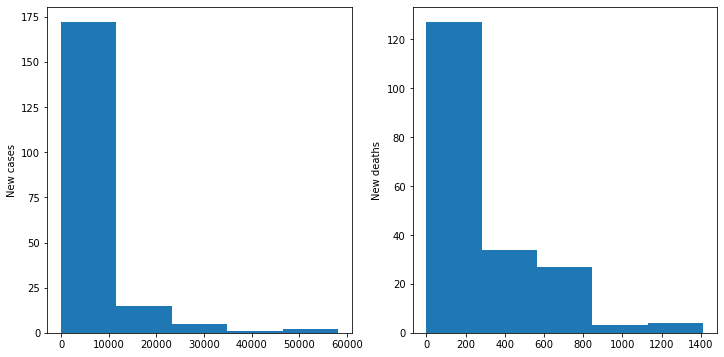

In [301]:
mx_counts = MX[['Date_reported','New_cases','New_deaths']].copy()
mx_counts['Date_reported'] = pd.to_datetime(mx_counts['Date_reported'])
mx_counts.set_index('Date_reported', inplace=True)

weekly_sum = mx_counts.resample('W').sum()
weekly_avg = mx_counts.resample('W').mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(weekly_avg['New_cases'], bins = 5)
ax[0].set_ylabel('New cases')
ax[1].hist(weekly_avg['New_deaths'], bins = 5)
ax[1].set_ylabel('New deaths')
plt.plot()

In [1095]:
mx_counts.index

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15',
               '2023-09-16', '2023-09-17', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21'],
              dtype='datetime64[ns]', name='Date_reported', length=1358, freq=None)

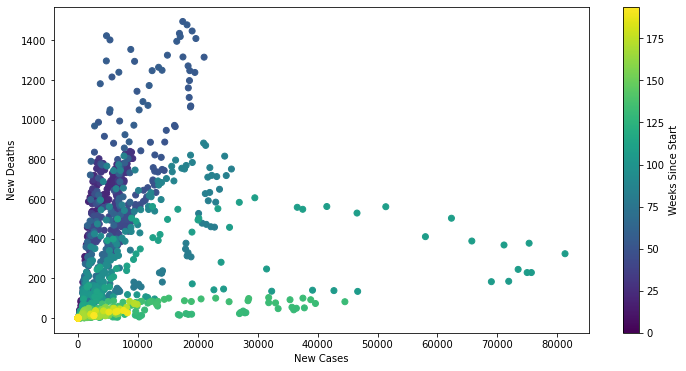

In [1098]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

# Convert Timestamps to numerical values (e.g., days since a specific date)
min_date = min(mx_counts.index)
mx_counts['Days'] = (mx_counts.index - min_date).days/7

# Normalize the 'Days' column for coloring
norm = Normalize(vmin=min(mx_counts['Days']), vmax=max(mx_counts['Days']))

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Scatter plot with colored data points
scatter = ax.scatter(mx_counts['New_cases'], mx_counts['New_deaths'], c=mx_counts['Days'], cmap='viridis', norm=norm)

# Create a color bar for the index
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Weeks    Since Start')  # Set the color bar label

# Set labels
plt.xlabel('New Cases')
plt.ylabel('New Deaths')

plt.show()


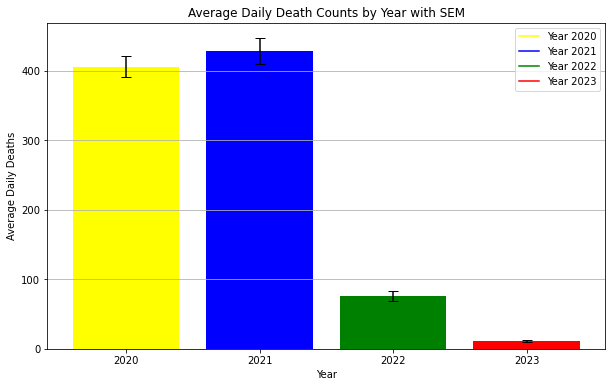

In [344]:
# Calculate the average death counts and SEM for each year
avg_daily_deaths_by_year = mx_counts.groupby('Year')['New_deaths'].mean()
sem_daily_deaths_by_year = mx_counts.groupby('Year')['New_deaths'].sem()  # Standard Error of the Mean

# Create a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(avg_daily_deaths_by_year.index, avg_daily_deaths_by_year.values, color=[year_colors.get(year, 'gray') for year in avg_daily_deaths_by_year.index], yerr=sem_daily_deaths_by_year.values, capsize=5)
plt.xlabel('Year')
plt.ylabel('Average Daily Deaths')
plt.title('Average Daily Death Counts by Year with SEM')
plt.xticks(avg_daily_deaths_by_year.index)
plt.grid(axis='y')

# Add legend
legend_handles = [plt.Line2D([0], [0], color=color, label=f'Year {year}') for year, color in year_colors.items()]
plt.legend(handles=legend_handles)

plt.show()

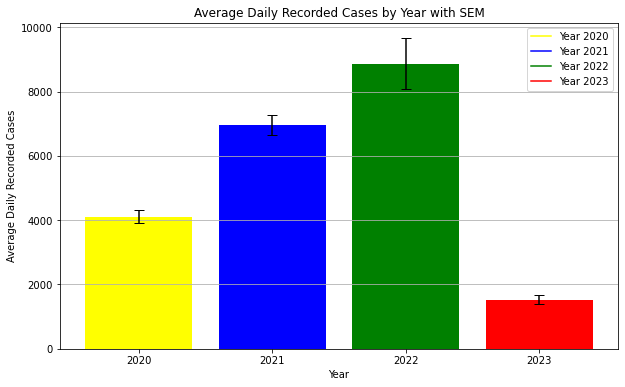

In [346]:
# Calculate the average death counts and SEM for each year
avg_daily_counts_by_year = mx_counts.groupby('Year')['New_cases'].mean()
sem_daily_counts_by_year = mx_counts.groupby('Year')['New_cases'].sem()  # Standard Error of the Mean

# Create a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(avg_daily_counts_by_year.index, avg_daily_counts_by_year.values, color=[year_colors.get(year, 'gray') for year in avg_daily_counts_by_year.index], yerr=sem_daily_counts_by_year.values, capsize=5)
plt.xlabel('Year')
plt.ylabel('Average Daily Recorded Cases')
plt.title('Average Daily Recorded Cases by Year with SEM')
plt.xticks(avg_daily_counts_by_year.index)
plt.grid(axis='y')

# Add legend
legend_handles = [plt.Line2D([0], [0], color=color, label=f'Year {year}') for year, color in year_colors.items()]
plt.legend(handles=legend_handles)

plt.show()

In [375]:
mx_counts['Year'].unique()

array([2020, 2021, 2022, 2023])

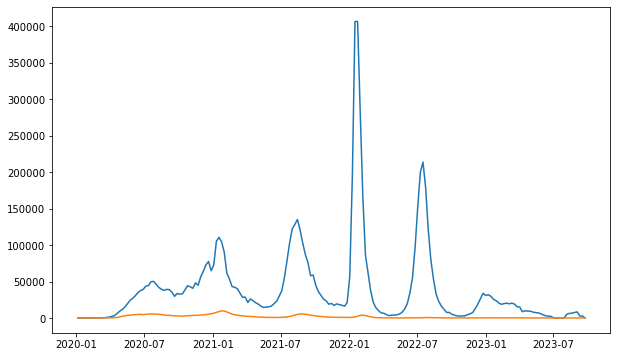

In [510]:
weekly_mx_sum = mx_counts[['New_cases','New_deaths']].resample('W').sum()
plt.figure(figsize=(10, 6))
plt.plot(weekly_mx_data)
plt.show()

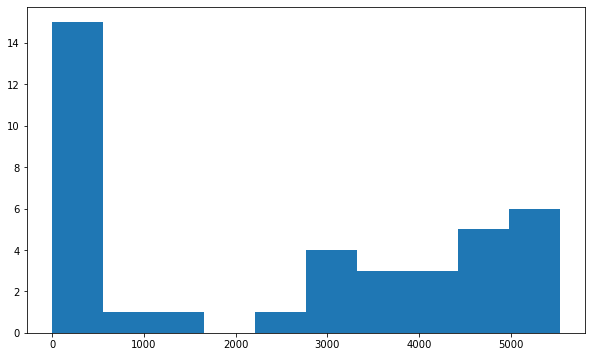

In [511]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['01-01-2020':'10-01-2020']['New_deaths'], bins=10)
plt.show()

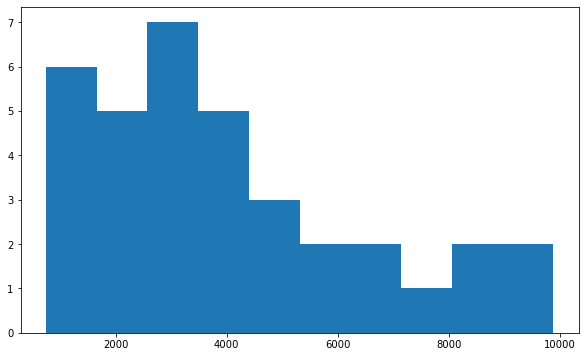

In [512]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['10-01-2020':'06-01-2021']['New_deaths'],bins=10)
plt.show()

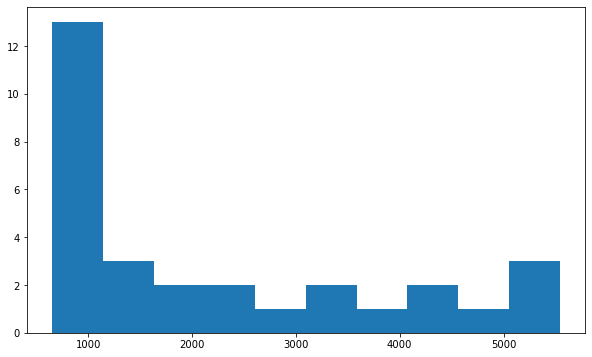

In [513]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['06-01-2021':'01-01-2022']['New_deaths'],bins=10)
plt.show()

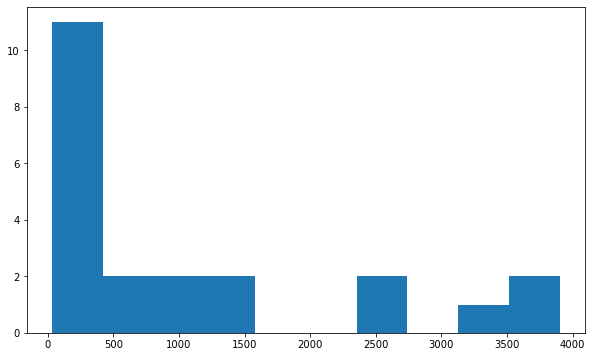

In [514]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['01-01-2022':'06-01-2022']['New_deaths'],bins=10)
plt.show()

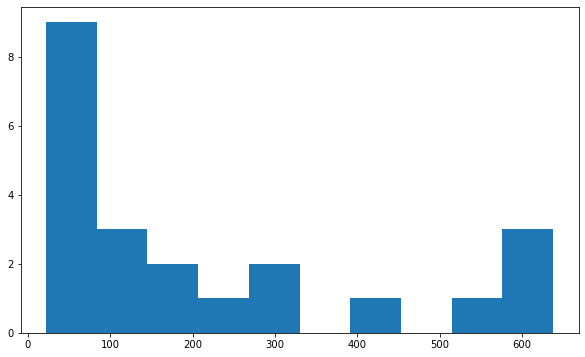

In [515]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['06-01-2022':'11-01-2022':]['New_deaths'],bins=10)
plt.show()

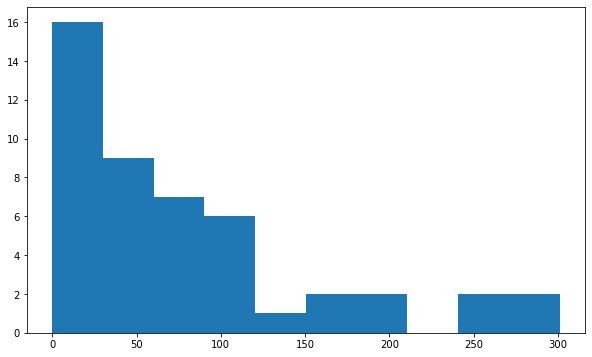

In [516]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_mx_sum['11-01-2022':]['New_deaths'], bins=10)
plt.show()

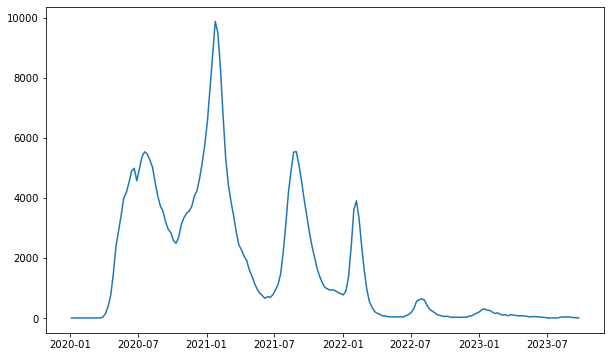

In [517]:
weekly_mx_mean = mx_counts[['New_cases','New_deaths']].resample('W').mean()
plt.figure(figsize=(10, 6))
plt.plot(weekly_mx_data['New_deaths'])
plt.show()

In [745]:
weekly_mx_sum['Count_diff'] = weekly_mx_sum['New_cases'].diff(1)
#sign_change_dates = weekly_mx_sum.index[(weekly_mx_sum['Count_diff'] > 0) & 
#                                        (weekly_mx_sum['Count_diff'].shift(-1) < 0) & 
#                                        (weekly_mx_sum['Count_diff'].shift(+1) > 0)].to_list()
sign_change_dates = weekly_mx_sum.index[(weekly_mx_sum['Count_diff'] < 0) & 
                                        (weekly_mx_sum['Count_diff'].shift(-1) > 0) & 
                                        (weekly_mx_sum['Count_diff'].shift(+1) < 0) &
                                        (weekly_mx_sum['New_cases'] < 30000)].to_list()

In [767]:
def CUMSUM_CPD(data, threshold):
    """
    Detect change points in a time series using the Cumulative Sum (CUSUM) method.

    Parameters:
        data (list or numpy array): The time series data.
        threshold (float): The threshold for detecting change points.

    Returns:
        change_points (list): A list of indices where change points occur.
    """
    data = np.asarray(data)  # Convert data to a numpy array
    n = len(data)
    change_points = []

    # Initialize CUSUM and reference values
    cusum = np.zeros(n)
    reference = data[0]

    for i in range(1, n):
        # Calculate the CUSUM at time i
        cusum[i] = max(0, cusum[i-1] + (data[i] - reference))

        # Check if the CUSUM exceeds the threshold
        if cusum[i] >= threshold:
            change_points.append(i)

        # Update the reference value (can be adjusted based on the application)
        reference = data[i]

    return change_points


aux = weekly_mx_sum.index[CUMSUM_CPD(weekly_mx_sum['New_cases'], 105000)].to_list()

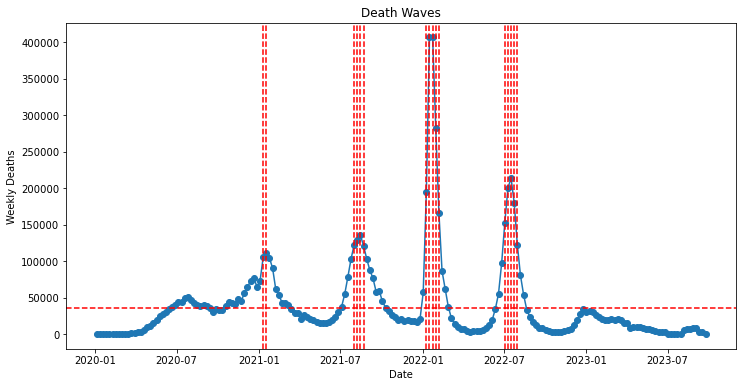

In [768]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_mx_sum.index, weekly_mx_sum['New_cases'], label='Weekly Deaths', marker='o', linestyle='-')

# Add vertical lines at the sign change dates
for date in aux:
    plt.axvline(x=date, color='red', linestyle='--')

# Set labels and legend

plt.axhline(y = 35000, color ='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.title('Death Waves')
plt.show()

Silhouette Score: 0.5763389272604291


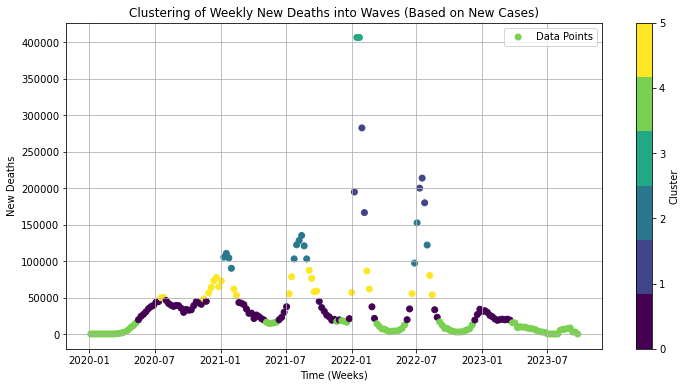

In [793]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Define the number of clusters (waves)
n_clusters = 6

# Extract the feature(s) from the DataFrame (use 'New_cases' for clustering)
X = weekly_mx_sum[['New_cases']].values

# Standardize the feature(s)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
weekly_mx_sum['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a colormap for the clusters
colormap = plt.cm.get_cmap('viridis', n_clusters)

# Visualize the clustering results with data points colored by cluster
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    weekly_mx_sum.index, 
    weekly_mx_sum['New_cases'], 
    c=weekly_mx_sum['Cluster'], 
    cmap=colormap,
    label='Data Points'
)
plt.xlabel('Time (Weeks)')
plt.ylabel('New Deaths')
plt.title('Clustering of Weekly New Deaths into Waves (Based on New Cases)')
plt.legend()

# Add colorbar to indicate cluster assignments
colorbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
colorbar.set_label('Cluster')

# Calculate silhouette score to assess clustering quality (optional)
silhouette_avg = silhouette_score(X_scaled, weekly_mx_sum['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

plt.grid(True)
plt.show()

Silhouette Score: 0.5498358444742024


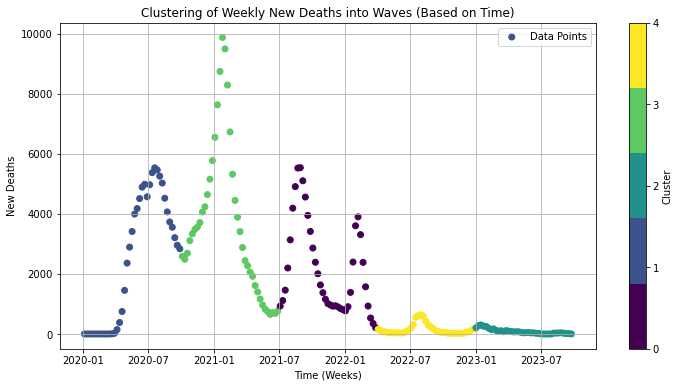

In [797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame named weekly_mx_sum with 'New_cases' and 'New_deaths' columns

# Define the number of clusters (waves)
n_clusters = 5

# Extract the feature(s) from the DataFrame (use index values as features for clustering)
X = np.array(weekly_mx_sum.index).reshape(-1, 1)

# Standardize the feature(s)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
weekly_mx_sum['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a colormap for the clusters
colormap = plt.cm.get_cmap('viridis', n_clusters)

# Visualize the clustering results with data points colored by cluster
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    weekly_mx_sum.index, 
    weekly_mx_sum['New_deaths'], 
    c=weekly_mx_sum['Cluster'], 
    cmap=colormap,
    label='Data Points'
)
plt.xlabel('Time (Weeks)')
plt.ylabel('New Deaths')
plt.title('Clustering of Weekly New Deaths into Waves (Based on Time)')
plt.legend()

# Add colorbar to indicate cluster assignments
colorbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
colorbar.set_label('Cluster')

# Calculate silhouette score to assess clustering quality (optional)
silhouette_avg = silhouette_score(X_scaled, weekly_mx_sum['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

plt.grid(True)
plt.show()


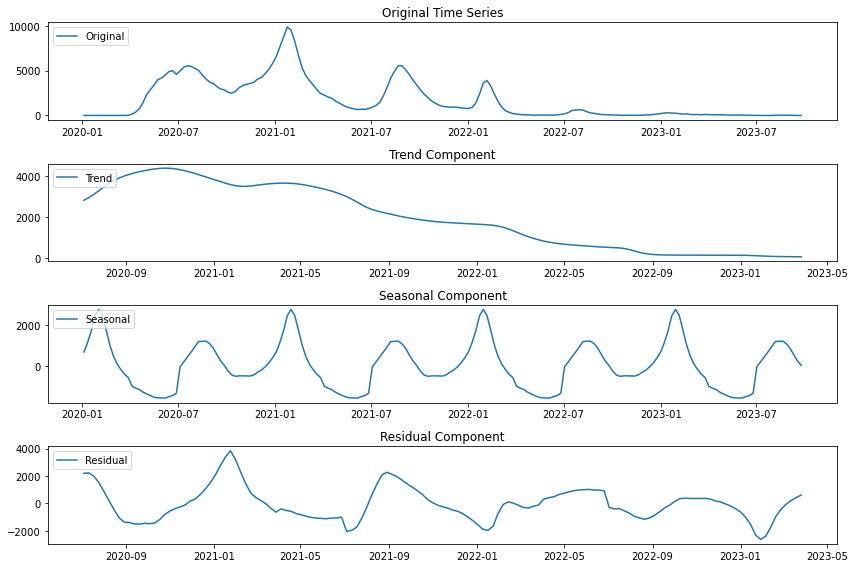

In [820]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame named weekly_mx_sum with a datetime index
# and a column 'New_deaths'

# Perform time series decomposition
result = seasonal_decompose(weekly_mx_sum['New_deaths'], model='additive')

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(weekly_mx_sum['New_deaths'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [838]:
import numpy as np

# Define the SIR model
def sir_model(params, t, N):
    beta, gamma = params
    S0, I0, R0 = N - 1, 1, 0  # Initial conditions
    S, I, R = [S0], [I0], [R0]

    for i in range(1, len(t)):
        dS = -beta * S[-1] * I[-1] / N
        dI = (beta * S[-1] * I[-1] / N) - gamma * I[-1]
        dR = gamma * I[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return np.array(S), np.array(I), np.array(R)

# Define the likelihood function
def likelihood(params, observed_data, t, N):
    S, I, _ = sir_model(params, t, N)
    predicted_cases = N - S
    # Assuming a Poisson likelihood
    log_likelihood = np.sum(-predicted_cases + observed_data * np.log(predicted_cases))
    return log_likelihood

# Define the prior distribution
def prior(params):
    # Use uniform priors for beta and gamma
    beta, gamma = params
    if 0.1< beta < 0.99 and 0.1< gamma < 0.99:
        return 0  # Priors within bounds
    else:
        return -np.inf  # Priors outside bounds

# Define the Metropolis-Hastings MCMC algorithm
def metropolis_hastings(initial_params, observed_data, t, N, num_samples=1000):
    current_params = initial_params
    samples = [current_params]

    for _ in range(num_samples):
        # Propose new parameters by adding random noise
        proposed_params = current_params + np.random.normal(scale=0.1, size=2)

        # Calculate the unnormalized posterior for proposed and current parameters
        posterior_current = likelihood(current_params, observed_data, t, N) + prior(current_params)
        posterior_proposed = likelihood(proposed_params, observed_data, t, N) + prior(proposed_params)

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(posterior_proposed - posterior_current)

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_params = proposed_params

        samples.append(current_params)

    return np.array(samples)


In [841]:
# Example usage
if __name__ == "__main__":
    # Generate synthetic observed data
    N = 1000  # Total population
    t = np.arange(1, 101)  # Time points
    true_params = [0.2, 0.9]  # True parameters (beta, gamma)
    _, observed_data, _ = sir_model(true_params, t, N)

    # Run Metropolis-Hastings MCMC
    initial_params = [0.1, 0.05]  # Initial parameters
    samples = metropolis_hastings(initial_params, observed_data, t, N, num_samples=50000)

    # Analyze the posterior samples as needed


/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/1810927376.py:25: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(-predicted_cases + observed_data * np.log(predicted_cases))


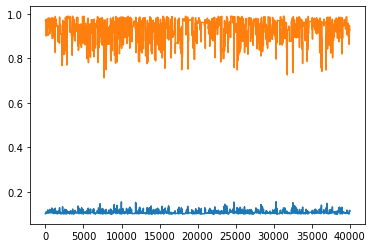

In [847]:
plt.plot(samples[10000:])

In [848]:
import numpy as np

# Define the SIR model
def sir_model(params, t, N):
    beta, gamma = params
    S0, I0, R0 = N - 10, 10, 0  # Initial conditions
    S, I, R = [S0], [I0], [R0]

    for i in range(1, len(t)):
        dS = -beta[i] * S[-1] * I[-1] / N
        dI = (beta[i] * S[-1] * I[-1] / N) - gamma[i] * I[-1]
        dR = gamma[i] * I[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return np.array(S), np.array(I), np.array(R)

# Define the likelihood function
def likelihood(params, observed_data, t, N):
    S, I, _ = sir_model(params, t, N)
    predicted_cases = N - S
    # Assuming a Poisson likelihood
    log_likelihood = np.sum(-predicted_cases + observed_data * np.log(predicted_cases))
    return log_likelihood

# Define the prior distribution
def prior(params):
    # Use uniform priors for beta and gamma
    beta, gamma = params
    if all(0 < b < 5 for b in beta) and all(0 < g < 2 for g in gamma):
        return 0  # Priors within bounds
    else:
        return -np.inf  # Priors outside bounds

# Define the Metropolis-Hastings MCMC algorithm for time-varying parameters
def metropolis_hastings_time_varying(initial_params, observed_data, t, N, num_samples=1000):
    current_params = initial_params
    samples = [current_params]

    for _ in range(num_samples):
        # Propose new parameters by adding random noise
        proposed_params = current_params + np.random.normal(scale=0.1, size=(2, len(t)))

        # Calculate the unnormalized posterior for proposed and current parameters
        posterior_current = likelihood(current_params, observed_data, t, N) + prior(current_params)
        posterior_proposed = likelihood(proposed_params, observed_data, t, N) + prior(proposed_params)

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(posterior_proposed - posterior_current)

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_params = proposed_params

        samples.append(current_params)

    return np.array(samples)


In [873]:
# Example usage
if __name__ == "__main__":
    # Generate synthetic observed data
    N = 1000  # Total population
    t = np.arange(1, 101)  # Time points
    true_beta = np.random.uniform(0.1, 0.5, size=100)
    true_gamma = np.random.uniform(0.05, 0.2, size=100)
    true_params = [true_beta, true_gamma]  # True time-varying parameters (beta, gamma)
    _, observed_data, _ = sir_model(true_params, t, N)

    # Run Metropolis-Hastings MCMC for time-varying parameters
    initial_params = [np.random.uniform(0.1, 0.5, size=100), np.random.uniform(0.05, 0.2, size=100)]  # Initial time-varying parameters
    samples = metropolis_hastings_time_varying(initial_params, observed_data, t, N, num_samples=50000)

    # Analyze the posterior samples as needed

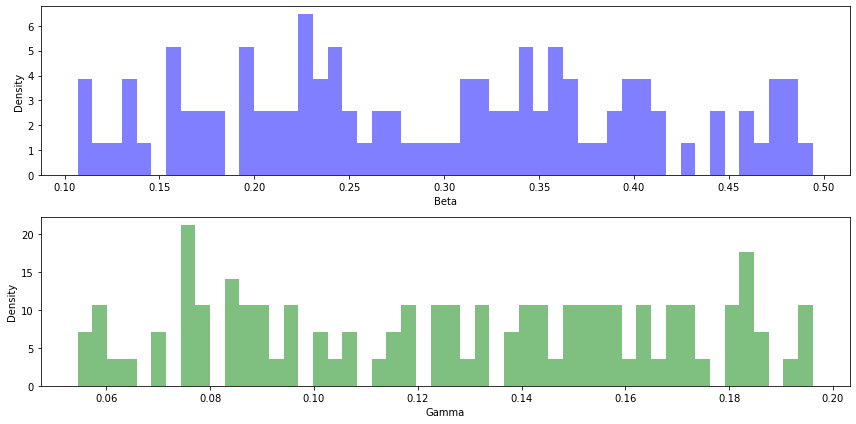

In [874]:
import matplotlib.pyplot as plt

# Plot histograms for beta and gamma
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # First subplot for beta
plt.hist(samples[:, 0, :].flatten(), bins=50, density=True, alpha=0.5, color='blue')
plt.xlabel('Beta')
plt.ylabel('Density')

plt.subplot(2, 1, 2)  # Second subplot for gamma
plt.hist(samples[:, 1, :].flatten(), bins=50, density=True, alpha=0.5, color='green')
plt.xlabel('Gamma')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [939]:
((true_beta-mean_beta)**2).sum()

2.0561061294562157

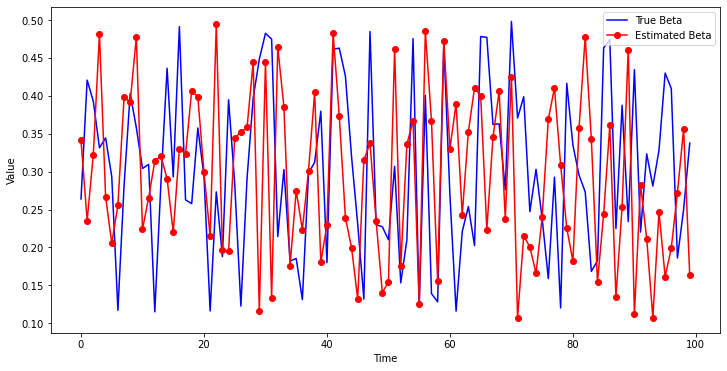

In [937]:
mean_beta = samples[:,0,:].mean(axis=0)
stderr_beta = 1/10000000000000 * samples[:, 0, :].std(axis=0)  # Assuming a normal distributionsamples[:, 0, :].std(axis=0).shape


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(true_beta, label='True Beta', color='blue')

# Plot estimated Beta values
ax.plot(mean_beta, label='Estimated Beta', color='red', marker='o')

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [920]:
import numpy as np

# Define the number of parameters and chains
num_params = 2
num_chains = 100

# Initialize an empty list to store Gelman-Rubin statistics for each parameter
gelman_rubin_statistics = []

# Iterate over each parameter
for param_index in range(num_params):
    # Initialize an empty array to store parameter values from each chain
    chain_values = np.zeros((num_chains, 50001))  # Assuming 50001 iterations
    
    # Extract parameter values from each chain
    for chain_index in range(num_chains):
        chain_values[chain_index] = samples[:, param_index, chain_index]
    
    # Calculate the within-chain variance for each chain
    within_chain_variances = np.var(chain_values, axis=1, ddof=1)
    
    # Calculate the between-chain variance
    overall_mean = np.mean(chain_values, axis=1)
    between_chain_variance = np.var(overall_mean, ddof=1)
     
    # Calculate the estimated variance of the parameter
    estimated_variance = (1 - 1 / len(chain_values[0])) * np.mean(within_chain_variances) + \
                         (between_chain_variance / len(chain_values[0]))
    
    # Calculate the potential scale reduction factor (R-hat)
    r_hat = np.sqrt(estimated_variance / np.mean(within_chain_variances))
    gelman_rubin_statistics.append(r_hat)

# Check the Gelman-Rubin statistics for each parameter
for param_index, statistic in enumerate(gelman_rubin_statistics):
    print(f'Parameter {param_index + 1}: R-hat value:', statistic)

# Optionally, check if all parameters and chains have converged
threshold = 1.1  # Common threshold, but you can adjust as needed
converged = all(statistic < threshold for statistic in gelman_rubin_statistics)

if converged:
    print("Chains have converged.")
else:
    print("Chains have not converged. Further sampling may be needed.")


Parameter 1: R-hat value: 6034779849942.763
Parameter 2: R-hat value: 5226275344704.169
Chains have not converged. Further sampling may be needed.


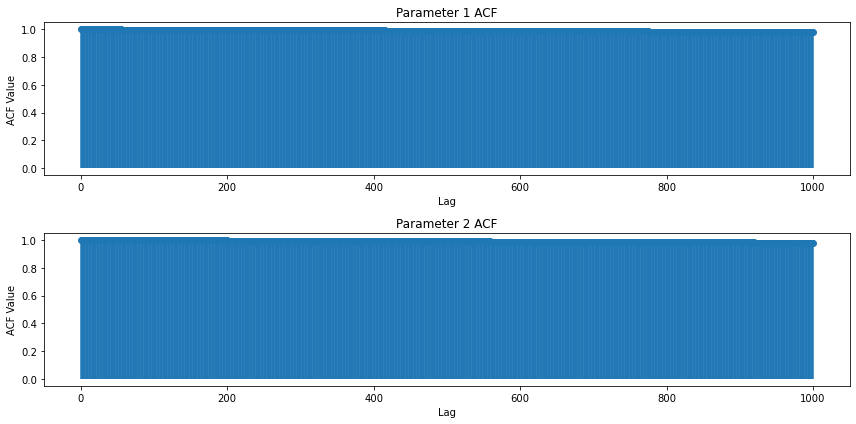

In [940]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'samples' is your MCMC sample array (shape: [num_samples, num_parameters])

# Define a function to compute the ACF for a given parameter
def autocorrelation(samples, lag):
    n = len(samples)
    mean = np.mean(samples)
    numerator = np.sum((samples[:n - lag] - mean) * (samples[lag:] - mean))
    denominator = np.sum((samples - mean) ** 2)
    return numerator / denominator

# Set the number of lags you want to compute the ACF for
max_lag = 1000  # You can adjust this value based on your needs

# Compute the ACF for each parameter up to the maximum lag
acf_values = []
for param_index in range(samples.shape[1]):  # Loop over each parameter
    acf_param = [autocorrelation(samples[:, param_index], lag) for lag in range(max_lag + 1)]
    acf_values.append(acf_param)

# Plot the ACF for each parameter
plt.figure(figsize=(12, 6))
for param_index, acf_param in enumerate(acf_values):
    plt.subplot(samples.shape[1], 1, param_index + 1)
    plt.stem(range(max_lag + 1), acf_param, basefmt=" ", use_line_collection=True)
    plt.title(f'Parameter {param_index + 1} ACF')
    plt.xlabel('Lag')
    plt.ylabel('ACF Value')

plt.tight_layout()
plt.show()


# Here is my first attempt with all my trial and error learnings

Observed daily death counts: 
 [   0    0    0    4   24  146  382  749 1453 2361 2893 3414 3994 4178
 4512 4891 4986 4569 4971 5374 5534 5464 5258 5027 4522 4065 3731 3556
 3208 2955 2840 2586 2488 2689 3107 3336 3482]


Observed daily infectious counts: 
 [    5    45   183   669  1214  2134  3291  5958  9264 11571 15196 19538
 24187 26973 30556 34822 37587 39306 43553 44406 49775 50177 45999 41814
 39452 37867 39230 38873 35339 29659 33716 32636 33071 38778 44301 42679
 40741]


<AxesSubplot:>

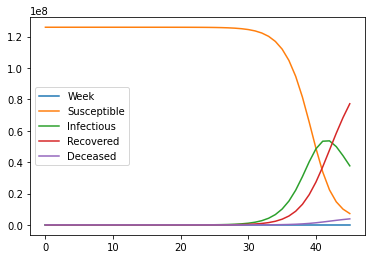

In [1010]:
#Simulate the first epidemic wave
num_weeks = 45
obs_D = weekly_mx_sum['New_deaths'][8:num_weeks].values
obs_I = weekly_mx_sum['New_cases'][8:num_weeks].values

#Print the weekly counts for both variables of interest
print('Observed daily death counts: \n', obs_D)
print('\n')
print('Observed daily infectious counts: \n', obs_I)

#Define initial conditions for our SIRD model
N = 126000000
I_0 = 1
S_0 = N - I_0
R_0 = 0
D_0 = 0

#Define real parameter values
beta_real = 0.8 # Infection rate (lower value for a slower spread)
gamma_real = 0.2  # Recovery rate (lower value for a slower recovery)
mu_real = 0.01  # Mortality rate (lower value for a lower mortality)

#Initialize model vectors
S = np.zeros(num_weeks+1)
I = np.zeros(num_weeks+1)
R = np.zeros(num_weeks+1)
D = np.zeros(num_weeks+1)

#Add initial conditions
S[0] = S_0 
I[0] = I_0 
R[0] = R_0 
D[0] = D_0

beta= beta_real
gamma = gamma_real
mu = mu_real

for t in range(1,num_weeks+1):
    new_infections = beta * S[t - 1] * I[t - 1]
    new_recoveries = gamma * I[t - 1]
    new_deaths = mu * I[t - 1]
    
    S[t] = S[t-1] - new_infections/N
    I[t] = I[t-1] + new_infections/N - new_recoveries - new_deaths
    R[t] = R[t-1] + new_recoveries
    D[t] = D[t-1] + new_deaths

simulation_df = pd.DataFrame({
    'Week': range(num_weeks + 1),
    'Susceptible': S,
    'Infectious': I,
    'Recovered': R,
    'Deceased': D
})
simulation_df.plot()

In [1070]:
def sird_TVP(states, params, N):
    S, I, R, D = states
    beta, gamma , mu = params
    
    S_new = S - beta * I / N
    I_new = I + beta* I / N - gamma * I - mu * I
    R_new = R + gamma * I
    D_new = D + mu * I
    
    if(beta * I / N > S):
        print('Error: new infections greater than S')

    return [S_new, I_new, R_new, D_new]


def likelihood_TVP(states, params, observed_data, N):
    _, _, _, D = sir_transition(states, params, N)
    # Assuming a Poisson likelihood
    log_likelihood = np.sum(observed_data * np.log(D) - D)
    return log_likelihood

#################################################### 

def sir_model2(params, t, N):
    beta, gamma, mu = params
    S0, I0, R0 , D0 = N - 1, 1, 0, 0 # Initial conditions
    S, I, R , D = [S0], [I0], [R0], [D0]

    for i in range(1, t):
        dS = -beta * S[-1] * I[-1] / N
        dI = (beta * S[-1] * I[-1] / N) - gamma * I[-1] - mu * I[-1]
        dR = gamma * I[-1]
        dD = mu * I[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
        D.append(D[-1] + dD)

    return np.array(S), np.array(I), np.array(R), np.array(D)

# Define the uninformative prior distribution
def prior(params):
    # Use uniform priors for beta and gamma
    beta, gamma, mu = params
    if 0.01< beta <0.99 and 0.01< gamma <0.99 and 0.0001< mu <0.5:
        return 0  # Priors within bounds
    else:
        return -np.inf  # Priors outside bounds

In [1034]:
def MH_MCMC(initial_params, observed_data, t, N, num_samples, num_chains, burn_in):
    # Initialize empty lists to store samples for each chain
    all_samples = [[] for _ in range(num_chains)]

    for chain in range(num_chains):
        current_params = initial_params[chain]
        samples = [current_params]

        for i in range(num_samples):
            # Propose new parameters by adding random noise
            variances = np.array([0.25, 0.15, 0.015])
            proposed_params = current_params + np.random.normal(scale=variances, size=len(initial_params[0]))

            # Calculate the unnormalized posterior for proposed and current parameters
            posterior_current = likelihood2(current_params, observed_data, t, N) + prior(current_params)
            posterior_proposed = likelihood2(proposed_params, observed_data, t, N) + prior(proposed_params)

            # Calculate the acceptance ratio
            acceptance_ratio = np.exp(posterior_proposed - posterior_current)

            # Accept or reject the proposal
            if np.random.rand() < acceptance_ratio:
                current_params = proposed_params

            # Add the current parameter values to the samples list
            samples.append(current_params)

        # Remove the burn-in samples
        samples = samples[burn_in:]

        # Store the samples for this chain
        all_samples[chain] = samples

    return np.array(all_samples)

In [1035]:

t = 45
N = 126000000
observed_data = weekly_mx_sum['New_deaths'][8:t+8].values
num_samples = 10000
num_chains = 2
burn_in = 1000

initial_params = []

#Define real parameter values
beta_real = 0.8 # Infection rate (lower value for a slower spread)
gamma_real = 0.2  # Recovery rate (lower value for a slower recovery)
mu_real = 0.01  # Mortality rate (lower value for a lower mortality)

for _ in range(num_chains):
    # Create an array of initial values for the parameters
    initial_values = np.array([beta_real + np.random.normal(scale = 0.3), gamma_real + np.random.normal(scale = 0.2), mu_real + np.random.normal(scale = 0.015)])  # Replace with actual values
    initial_params.append(initial_values)

samples = MH_MCMC(initial_params, observed_data, t, N, num_samples, num_chains, burn_in)

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/549370113.py:55: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(observed_data * np.log(D) - D)
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/549370113.py:55: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(observed_data * np.log(D) - D)
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/549370113.py:55: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(observed_data * np.log(D) - D)
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/549370113.py:30: RuntimeWarning: overflow encountered in double_scalars
  dS = -beta * S[-1] * I[-1] / N
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_19693/549370113.py:31: RuntimeWarning: overflow encountered in double_scalars
  dI = (beta * S[-1] * I[-1] / N) - gamma * I[-1] - mu * I[-1]
/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_1

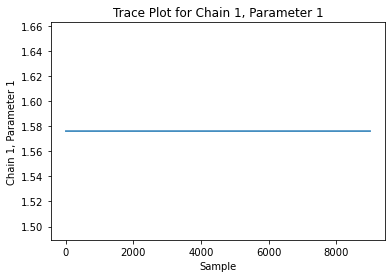

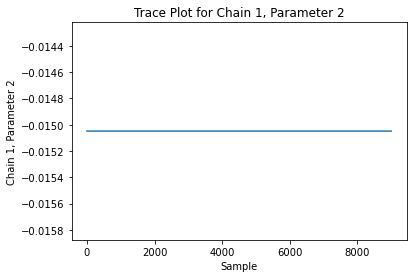

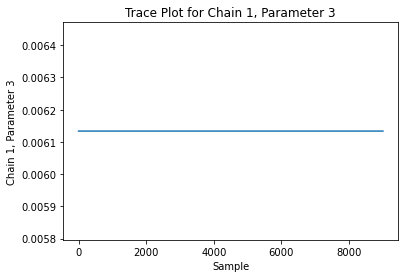

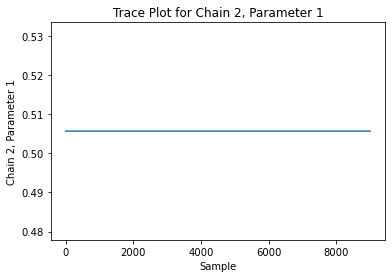

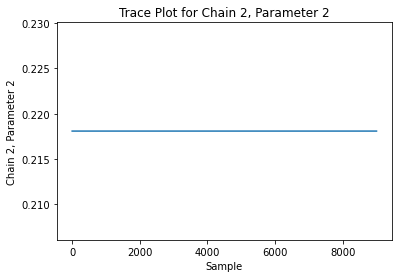

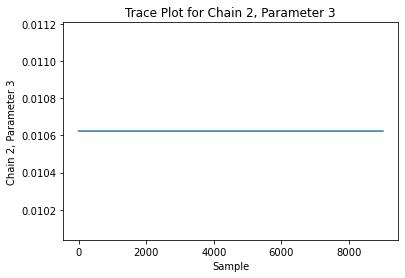

In [1036]:
# Plot the trace for each parameter and chain
for chain in range(2):  # Assuming 2 chains
    for param in range(3):  # Assuming 3 parameters
        plt.figure()
        plt.plot(samples[chain, :, param])
        plt.xlabel('Sample')
        plt.ylabel(f'Chain {chain + 1}, Parameter {param + 1}')
        plt.title(f'Trace Plot for Chain {chain + 1}, Parameter {param + 1}')


In [1078]:
import theano.tensor as tt
# Define your observed data and other parameters
t = 45
N = 126000000
observed_data = weekly_mx_sum['New_deaths'][8:t+8].values


def likelihood3(params, observed_data, t, N):
    S, I, _, D = sir_model2(params, t, N)
    
    # Define a Theano tensor variable for observed_data
    observed_data_tt = tt.as_tensor_variable(observed_data)
    
    # Compute the log-likelihood using Theano tensor operations
    log_likelihood = tt.sum(tt.switch(D > 0, observed_data_tt * tt.log(D), 0) - D)
    
    return log_likelihood





# Create a PyMC3 model for a single chain
with pm.Model() as model:
    # Priors for beta, gamma, and mu
    beta = pm.Uniform('beta', lower=0.01, upper=0.99)
    gamma = pm.Uniform('gamma', lower=0.01, upper=0.99)
    mu = pm.Uniform('mu', lower=0.0001, upper=0.5)

    # Likelihood
    log_likelihood = likelihood3([beta, gamma, mu], observed_data, t, N)
    
    # Define the likelihood as a deterministic variable
    likelihood = pm.Deterministic('likelihood', log_likelihood)

    # MCMC sampling
    trace = pm.sample(1000, tune=1000, cores=1)

# Analyze the results for the single chain
pm.traceplot(trace)
pm.summary(trace)


TypeError: Variables do not support boolean operations.